In [ ]:
# Modulos y datos 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Scikit - learn 
# Una funcion para particionar datos en train/test
from sklearn.model_selection import train_test_split

# Clase para construir modelos de regresion lineal 
from sklearn.linear_model import LinearRegression
#
# Para conocer la calidad de mi modelo : test
from sklearn import metrics

#datos
datos = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/Consumo_cerveza_SP.csv")

In [ ]:
# Preprocesamiento de datos
# Tipos de datos de cada columna
datos.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [ ]:
# Valores faltantes
datos.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [ ]:
# Arreglemos los nombres de las columnas : Eliminemos los espacios en blanco
datos.rename(columns = {"Temperatura Media (C)" : 
                       "Temperatura_Media",
             "Temperatura Minima (C)" : "Temperatura_Minima",
             "Temperatura Maxima (C)" : "Temperatura_Maxima",
             "Precipitacao (mm)" : "Precipitacion",
             "Final de Semana" : "Fin_de_semana",
             "Consumo de cerveja (litros)" : "Consumo_litros"},
             inplace = True)


In [ ]:
# Mostremos los nombres de las columnas
datos.columns

Index(['Data', 'Temperatura_Media', 'Temperatura_Minima', 'Temperatura_Maxima',
       'Precipitacion', 'Fin_de_semana', 'Consumo_litros'],
      dtype='object')

In [ ]:
# Otro problema: Esque las columnas estan almacenadas como cadenas de caracteres
# usan una coma decimal en vez de el puntos decimal : 'Temperatura Media', 'Temepratura Minima',
# 'Temperatura Maxima', 'Precipitacion', ..
#
datos.Temperatura_Media = datos.Temperatura_Media.str.replace(",",".").astype(float)
datos.Temperatura_Minima = datos.Temperatura_Minima.str.replace(",",".").astype(float)
datos.Temperatura_Maxima = datos.Temperatura_Maxima.str.replace(",",".").astype(float)
datos.Precipitacion = datos.Precipitacion.str.replace(",",".").astype(float)

In [ ]:
# Como quedaron lso tipos de datos para las columnas
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data                365 non-null    object 
 1   Temperatura_Media   365 non-null    float64
 2   Temperatura_Minima  365 non-null    float64
 3   Temperatura_Maxima  365 non-null    float64
 4   Precipitacion       365 non-null    float64
 5   Fin_de_semana       365 non-null    float64
 6   Consumo_litros      365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 51.6+ KB


In [ ]:
# Eliminemos los valores faltantes
datos = datos.dropna()
datos.isnull().sum()

Data                  0
Temperatura_Media     0
Temperatura_Minima    0
Temperatura_Maxima    0
Precipitacion         0
Fin_de_semana         0
Consumo_litros        0
dtype: int64

In [ ]:
# Como la columna Dataa tiene informacion en la linea del tiempo 
# voy a transformarla a un dato de tipo datatime
datos.Data = pd.to_datetime(datos.Data)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                365 non-null    datetime64[ns]
 1   Temperatura_Media   365 non-null    float64       
 2   Temperatura_Minima  365 non-null    float64       
 3   Temperatura_Maxima  365 non-null    float64       
 4   Precipitacion       365 non-null    float64       
 5   Fin_de_semana       365 non-null    float64       
 6   Consumo_litros      365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
# Construyamos nuestro promer modelo de regresion lineal
#
# Variable dependiente
y = datos.Consumo_litros

# Variable independiente
x = datos[["Temperatura_Maxima", "Precipitacion", "Fin_de_semana"]]

#Particionamos nuestro datos
X_train, X_test, y_train, y_test = train_test_split(x,# Almacena las vriables independientes
                                                    y,# Almacena la variable dependiente
                                                    test_size=0.2 # Espicifico el porcentaje de los datos
                                                                  # asignados para testear/probar el modelo
                                                    )


In [38]:
y_train.head()

205    20.738
261    31.836
145    22.162
131    19.052
50     24.567
Name: Consumo_litros, dtype: float64

In [42]:
# Instanciamos la clase para el modelo 
model1 = LinearRegression()


In [43]:
dir(LinearRegression)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'fit',
 'get_params',
 'predict',
 'score',
 'set_params']

In [44]:
# Ajustemos el modelo a los datos de entrenamiento
model1.fit(X_train, y_train)
#help(model1.fit)

LinearRegression()

In [45]:
# R2
R2 = model1.score(X_train, y_train)
R2

0.7239588763312111

In [48]:
# Parametros del modeloos : Coeficientes que acompañan a las variables independientes
m = model1.coef_
b = model1.intercept_
# Recordar que el modelo esta compuesto por 3 variables independientes
print(""" El modelo es : y = %f (TempMaxima) + %f (Precipitacion) + %f (FinSemana)
 +  %f """ %(m[0],m[1],m[2], b))


 El modelo es : y = 0.659516 (TempMaxima) + -0.059365 (Precipitacion) + 5.271789 (FinSemana)
 +  6.799245 


In [49]:
# Construyamos las predicciones para el dataset 
y_sombrero = model1.predict(X_test)
y_sombrero

array([24.85939882, 32.6366967 , 22.80172703, 31.5267429 , 28.29945202,
       19.28888447, 26.19021921, 24.14450404, 23.45643939, 32.38411312,
       23.81474627, 27.15444601, 25.33163204, 29.28439002, 30.00985713,
       18.24708418, 25.52355023, 24.00853172, 21.19839536, 32.14535342,
       27.37613025, 24.72779623, 29.28439002, 31.14672472, 27.96969425,
       26.84851781, 22.95737605, 27.17827559, 24.48214923, 22.17229316,
       30.65191304, 22.35445668, 28.89301602, 21.28874313, 24.67211649,
       26.71791532, 28.29511669, 28.29945202, 27.34641371, 27.11232403,
       20.90230551, 29.2227738 , 21.77024805, 25.85924448, 25.59543826,
       24.73806804, 33.17553178, 27.50803336, 22.23190894, 25.92519604,
       20.20186588, 24.86997115, 27.05521072, 24.20248452, 31.79176607,
       24.40831026, 24.74041828, 26.44847314, 28.11477094, 29.41629313,
       28.88707954, 25.92519604, 22.82547294, 17.87763833, 23.06618356,
       18.06093513, 22.2978605 , 24.93592271, 25.52515137, 21.30

In [51]:
# Calculemos los errores/residuos
errores = y_sombrero - y_test
errores

285   -1.663601
352    0.100697
97    -0.560273
86     1.766743
279   -2.029548
         ...   
170    2.470151
120    3.369587
263   -1.397645
109    0.553931
203    1.356265
Name: Consumo_litros, Length: 73, dtype: float64

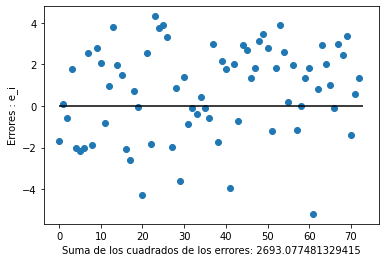

In [61]:
# Visualicemos los errores
plt.scatter(range(0,len(errores)),errores)
plt.hlines(y = 0,
            xmin = 0,
            xmax = len(errores),
            linestyles = "solid")
plt.ylabel("Errores : e_i")
plt.xlabel("Suma de los cuadrados de los errores: " + str((errores.sum())**2))
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


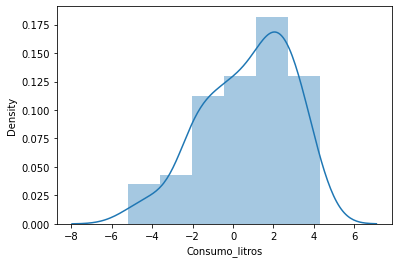

In [70]:
# Distribucion de lso errores
sns.distplot(errores)
plt.show()

In [71]:
# R2 para los datos de testeo
model1.score(X_test, y_test)


0.70640473928768

In [72]:
# Usemos una matrica de calidad
dir(metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 '

In [73]:
# Documentacion para calcular el MAPE
help(metrics.mean_absolute_percentage_error)

Help on function mean_absolute_percentage_error in module sklearn.metrics._regression:

mean_absolute_percentage_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
    Mean absolute percentage error (MAPE) regression loss.
    
    Note here that the output is not a percentage in the range [0, 100]
    and a value of 100 does not mean 100% but 1e2. Furthermore, the output
    can be arbitrarily high when `y_true` is small (which is specific to the
    metric) or when `abs(y_true - y_pred)` is large (which is common for most
    regression metrics). Read more in the
    :ref:`User Guide <mean_absolute_percentage_error>`.
    
    .. versionadded:: 0.24
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samp

In [75]:
MAPE_model1 = metrics.mean_absolute_percentage_error(y_test, y_sombrero)*100
MAPE_model1

8.123817671847819

In [86]:
# Resumamos nuestros pasos para construir un modelo de regresion lineal
# Particionaar el dataset en train/test
# Variables independientes
x = datos[["Temperatura_Minima", "Precipitacion", "Fin_de_semana"]]

#Particionamos nuestro datos
X_train, X_test, y_train, y_test = train_test_split(x,# Almacena las vriables independientes
                                                    y,# Almacena la variable dependiente
                                                    test_size=0.2 # Espicifico el porcentaje de los datos
                                                                  # asignados para testear/probar el modelo
                                                    )
# Instanciamos la clase LinearRegression
model2 = LinearRegression()

# Ajusto el modelo a los datos de entrenamiento
model2.fit(X_train, y_train)

# Con el modelo ajustado construimos unas predicciones para los datos de test
y_sombrero = model2.predict(X_test)

# MAPE: Indicador de calidad
MAPE_model2 = metrics.mean_absolute_percentage_error(y_test, y_sombrero)*100
MAPE_model2 


9.655026914145235

In [82]:
# Resumamos nuestros pasos para construir un modelo de regresion lineal
# Particionaar el dataset en train/test
# Variables independientes
x = datos[["Temperatura_Media", "Precipitacion", "Fin_de_semana"]]

#Particionamos nuestro datos
X_train, X_test, y_train, y_test = train_test_split(x,# Almacena las vriables independientes
                                                    y,# Almacena la variable dependiente
                                                    test_size=0.2 # Espicifico el porcentaje de los datos
                                                                  # asignados para testear/probar el modelo
                                                    )
# Instanciamos la clase LinearRegression
model3 = LinearRegression()

# Ajusto el modelo a los datos de entrenamiento
model3.fit(X_train, y_train)

# Con el modelo ajustado construimos unas predicciones para los datos de test
y_sombrero = model3.predict(X_test)

# MAPE: Indicador de calidad
MAPE_model3 = metrics.mean_absolute_percentage_error(y_test, y_sombrero)*100
MAPE_model3 


8.68249441457118

In [87]:
# Resumamos nuestros pasos para construir un modelo de regresion lineal
# Particionaar el dataset en train/test
# Variables independientes
x = datos[["Temperatura_Minima", "Temperatura_Media", "Temperatura_Maxima", "Precipitacion", "Fin_de_semana"]]

#Particionamos nuestro datos
X_train, X_test, y_train, y_test = train_test_split(x,# Almacena las vriables independientes
                                                    y,# Almacena la variable dependiente
                                                    test_size=0.2 # Espicifico el porcentaje de los datos
                                                                  # asignados para testear/probar el modelo
                                                    )
# Instanciamos la clase LinearRegression
model4 = LinearRegression()

# Ajusto el modelo a los datos de entrenamiento
model4.fit(X_train, y_train)

# Con el modelo ajustado construimos unas predicciones para los datos de test
y_sombrero = model4.predict(X_test)

# MAPE: Indicador de calidad
MAPE_model4 = metrics.mean_absolute_percentage_error(y_test, y_sombrero)*100
MAPE_model4 


7.934461765272285